In [1]:
import pandas as pd
df=pd.read_csv('casa.csv')
import statsmodels.formula.api as smf


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


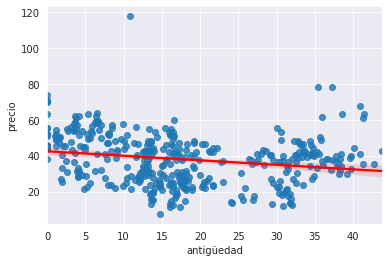

In [7]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

sns.set_style('darkgrid')

data=pd.read_csv('casa.csv')[['age','distance','stores','area']]
datos=data.rename(columns={"age":'antigüedad',"distance":"distancia","stores":'tiendas',"area":'precio'})
nuevo=datos[['antigüedad','distancia','tiendas']]
regression=LinearRegression()
regression.fit(nuevo,datos['precio']) #train

#predict
data_predict=nuevo.to_numpy()

y_hat=regression.predict(data_predict)#datos de prediccion
#print(y_hat,"-------------prediccion del precio--------------")
#print("intercepto o b_0 ",regression.intercept_)
#print("coeficientes", regression.coef_)
sns.regplot(x='antigüedad',y='precio',data=datos,line_kws={'color':'red'})
print(" ")
#individual simple linear regression



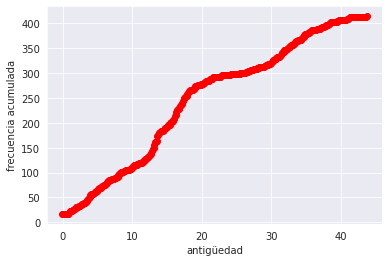

In [10]:
counts, start, dx, _ = scipy.stats.cumfreq(datos['antigüedad'],numbins=415)
x = np.arange(counts.size) * dx + start

plt.plot(x, counts, 'ro')
plt.xlabel('antigüedad')
plt.ylabel('frecuencia acumulada')

plt.show()

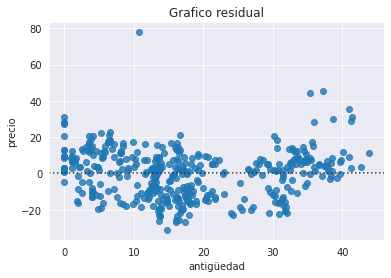

In [ ]:
sns.residplot(datos['antigüedad'],datos['precio']).set_title("Grafico residual")
print("")

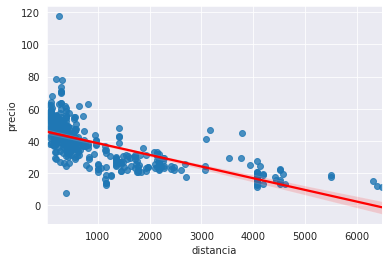

In [ ]:
sns.regplot(x='distancia',y='precio',data=datos,line_kws={'color':'red'})

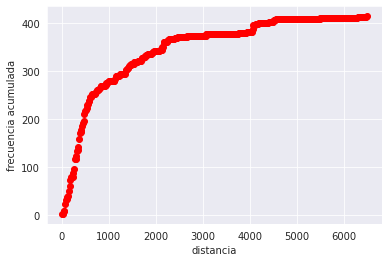

In [ ]:
counts, start, dx, _ = scipy.stats.cumfreq(datos['distancia'],numbins=415)
x = np.arange(counts.size) * dx + start

plt.plot(x, counts, 'ro')
plt.xlabel('distancia')
plt.ylabel('frecuencia acumulada')

plt.show()

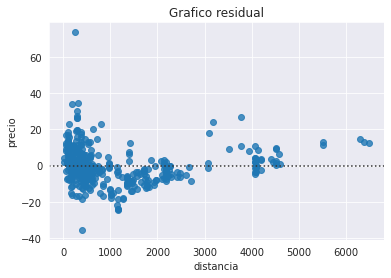

In [ ]:
sns.residplot(datos['distancia'],datos['precio']).set_title("Grafico residual")
print("")

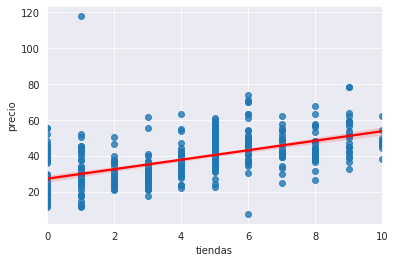

In [ ]:
sns.regplot(x='tiendas',y='precio',data=datos,line_kws={'color':'red'})
print("")

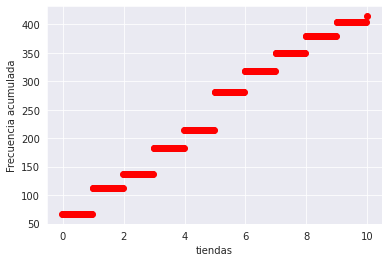

In [ ]:
counts, start, dx, _ = scipy.stats.cumfreq(datos['tiendas'],numbins=415)
x = np.arange(counts.size) * dx + start

plt.plot(x, counts, 'ro')
plt.xlabel('tiendas')
plt.ylabel('Frecuencia acumulada')

plt.show()

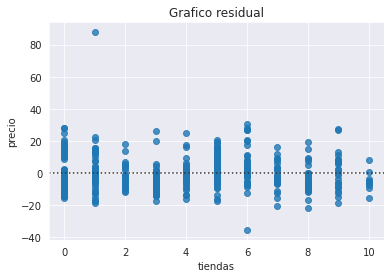

In [ ]:
sns.residplot(datos['tiendas'],datos['precio']).set_title("Grafico residual")
print("")

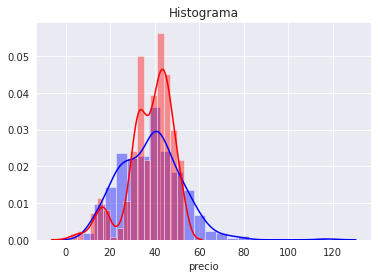

In [25]:
ax2=sns.distplot(datos["precio"],hist=True, color="b",label="valor actual")
sns.distplot(y_hat,hist=True,color="r",label='prediccion',ax=ax2).set_title("Histograma")
print("")

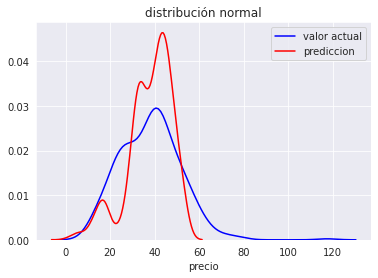

In [26]:
ax2=sns.distplot(datos["precio"],hist=False,color='b',label="valor actual")
sns.distplot(y_hat,hist=False,color='r',label='prediccion',ax=ax2).set_title("distribución normal")
print("")

In [13]:
reg=smf.ols('area ~ stores + distance + age',data=df)
res= reg.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     161.1
Date:                Fri, 18 Sep 2020   Prob (F-statistic):           5.44e-69
Time:                        23:35:11   Log-Likelihood:                -1506.5
No. Observations:                 414   AIC:                             3021.
Df Residuals:                     410   BIC:                             3037.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.9773      1.385     31.041      0.0